In [1]:
###Run this code to create a JSON file that diables auto-quotes and auto-brackets. After executing the Python 
#command, or manually creating the file, restart your Jupyter notebook, and it should stop auto-closing quotes
#and brackets.

#from notebook.services.config import ConfigManager
#c = ConfigManager()
#c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

###Keyboard Shortcuts
#Ctrl + Enter: Run single cell of code (similar to R)
#Ctrl + Shift + Enter: Run entire notebook (similar to R)

In [2]:
#Intro to Web Scraping and BeautifulSoup
#https://www.youtube.com/watch?v=XQgXKtPSzUI

#exporting to excel
#df.to_excel("excel_file_name.xlsx")

import pandas as pd
import numpy as np
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt
import copy #for making shallow & deep copies
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#import re #for splitting strings using multiple delimiters
import time
import random
from mpl_toolkits import mplot3d #for 3D plots

premiers = []
genres = []
scores = []

In [3]:
#Reading in raw export file from MAL
df0 = pd.read_excel('list3.xlsx')

#Removing unnecessary extra columns
columns = [11,14,19,21,23,25,26]
df = df0.iloc[:,columns]

#Renaming column names
df = df.rename(columns={'/anime/my_score':'myscore','/anime/my_status':'status','/anime/my_watched_episodes':'watched', \
                        '/anime/series_animedb_id':'id','/anime/series_episodes':'episodes', \
                        '/anime/series_title':'title','/anime/series_type':'type'})
df

,myscore,status,watched,id,episodes,title,type
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV
1,0,Plan to Watch,0,39783,0,5-toubun no Hanayome 2nd Season,TV
2,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA
3,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA
4,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA
...,...,...,...,...,...,...,...
288,0,Plan to Watch,0,35507,12,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,TV
289,0,Dropped,4,18677,12,Yuusha ni Narenakatta Ore wa Shibushibu Shuush...,TV
290,5,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV
291,7,Completed,12,37976,12,Zombieland Saga,TV


In [4]:
"""
#Creating complete df

#Open pages to scrape more data about shows
for i in range(len(df)): #number of rows of df
    #wait random time between 0-5 seconds before scraping data
    r = random.randint(0,5)
    time.sleep(r)

    URL = 'https://myanimelist.net/anime/%d/' % df.loc[i,'id']
    page = urlopen(URL)
    soup = BeautifulSoup(page,'html.parser')
    #finding all span-dark_text containers i.e. bolded text on left
    containers = soup.findAll('span',attrs={'class':'dark_text'})

    
    ####Getting container indecies
    #'Premiered' for type TV, 'Aired' for non-TV types
    if df.loc[i,'type'] == 'TV':
        keyword = 'Premiered'
        #outputs of this form 'Premiered:\nFall 2017'
        omit_start = 11 #omitting 'Premiered:\n'
    else:
        keyword = 'Aired'
        #outputs of this form 'Aired:\n Dec 10, 2005'
        omit_start = 9 #omitting 'Premiered:\n '

    #Extracts title texts and looks for index_container for Premiered or Aired
    for t in range(len(containers)):
        if keyword in containers[t].text:
            index_container_premiered = t
            break #breaks out of t loop once index found
        if t == len(containers):
            #if no index found 
            print('No index for index_container_premiered')
               
    #Extracts title texts and looks for index_container for Genre
    for t in range(len(containers)):
        if 'Genres' in containers[t].text:
            index_container_genre = t
            break #breaks out of t loop once index found
        if t == len(containers):
            #if no index found 
            print('No index for index_container_genre')

    #Extracts title texts and looks for index_container for Score
    for t in range(len(containers)):
        if 'Score' in containers[t].text:
            index_container_score = t
            break #breaks out of t loop once index found
        if t == len(containers):
            #if no index found 
            print('No index for index_container_score')
            
    ####Looks at parent object for easy access to div container much easier than findAll('div')
    premier = containers[index_container_premiered].parent.text.strip() #outputs of this form: see above
    premier = premier[omit_start:] #omitting see above
    premiers = premiers + [premier]

    container_parent = containers[index_container_genre].parent
    list_genres = container_parent.findAll('span')
    genre = []
    for g in list_genres[1:]: #exlcuding the first span object, which is the text 'Genres:'
        genre = genre + [g.text]
    genres = genres + [genre]

    score = containers[index_container_score].parent.text.strip() #outputs of this form: see above
    score = score[7:12] #only extracting float X.XXX
    scores = scores + [score]
    
    
df['premiered'] = premiers
df['genres'] = genres
df['score'] = scores
df.to_excel("df.xlsx")
df
"""

,myscore,status,watched,id,episodes,title,type,premiered,genres,score
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.621
1,0,Plan to Watch,0,39783,0,5-toubun no Hanayome 2nd Season,TV,Fall 2020,"[Harem, Comedy, Romance, School, Shounen]",N/A1
2,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.761
3,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.771
4,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Slice of Life, Comedy]",7.851
...,...,...,...,...,...,...,...,...,...,...
288,0,Plan to Watch,0,35507,12,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,TV,Summer 2017,"[Slice of Life, Psychological, Drama, School]",7.901
289,0,Dropped,4,18677,12,Yuusha ni Narenakatta Ore wa Shibushibu Shuush...,TV,Fall 2013,"[Comedy, Romance, Ecchi, Fantasy]",6.981
290,5,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV,Spring 2017,"[Action, Adventure, Magic, Fantasy]",7.161
291,7,Completed,12,37976,12,Zombieland Saga,TV,Fall 2018,"[Comedy, Music, Supernatural]",7.641


In [5]:
#Converting exported df back into correct format
df = pd.read_excel('df.xlsx')
df = df.drop(columns='Unnamed: 0') #removing column of indecies

#When exporting, genres entries got converted from list type to string
#Converting string representation of list to list type, string to float
import ast
genres = []
for i in range(len(df)):
    ini_list = df.loc[i,'genres']
    res = ast.literal_eval(ini_list) # Converting string to list 
    genres = genres + [res]
df['genres'] = genres

#When exporting, score entries got converted from float to string
#Converting string to float
df['score'] = pd.to_numeric(df['score'],errors='coerce') #'coerce' option turns non-floats into NAs

df

,myscore,status,watched,id,episodes,title,type,premiered,genres,score
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.621
1,0,Plan to Watch,0,39783,0,5-toubun no Hanayome 2nd Season,TV,Fall 2020,"[Harem, Comedy, Romance, School, Shounen]",NaN
2,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.761
3,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.771
4,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Slice of Life, Comedy]",7.851
...,...,...,...,...,...,...,...,...,...,...
288,0,Plan to Watch,0,35507,12,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,TV,Summer 2017,"[Slice of Life, Psychological, Drama, School]",7.901
289,0,Dropped,4,18677,12,Yuusha ni Narenakatta Ore wa Shibushibu Shuush...,TV,Fall 2013,"[Comedy, Romance, Ecchi, Fantasy]",6.981
290,5,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV,Spring 2017,"[Action, Adventure, Magic, Fantasy]",7.161
291,7,Completed,12,37976,12,Zombieland Saga,TV,Fall 2018,"[Comedy, Music, Supernatural]",7.641


In [6]:
#df subset - Only looking at scored series
DFA = df.loc[df['myscore'] > 0]
DFA = DFA.reset_index(drop=True) #reset df indecies
DFA

,myscore,status,watched,id,episodes,title,type,premiered,genres,score
0,7,Completed,12,38101,12,5-toubun no Hanayome,TV,Winter 2019,"[Harem, Comedy, Romance, School, Shounen]",7.621
1,4,Completed,12,36039,12,A.I.C.O.: Incarnation,ONA,"Mar 9, 2018","[Action, Sci-Fi]",6.761
2,8,Completed,10,36904,10,Aggressive Retsuko (ONA),ONA,"Apr 20, 2018","[Slice of Life, Comedy]",7.771
3,8,Completed,10,37985,10,Aggressive Retsuko (ONA) 2nd Season,ONA,"Jun 14, 2019","[Slice of Life, Comedy]",7.851
4,7,Completed,1,38815,1,Aggressive Retsuko: We Wish You a Metal Christmas,ONA,"Dec 20, 2018","[Slice of Life, Comedy]",7.331
...,...,...,...,...,...,...,...,...,...,...
192,8,Completed,12,37779,12,Yakusoku no Neverland,TV,Winter 2019,"[Sci-Fi, Mystery, Horror, Psychological, Thril...",8.691
193,8,Completed,12,32615,12,Youjo Senki,TV,Winter 2017,"[Action, Military, Magic]",8.081
194,8,Completed,1,37055,1,Youjo Senki Movie,Movie,"Feb 8, 2019","[Action, Military, Magic]",8.391
195,5,Completed,12,34176,12,Zero kara Hajimeru Mahou no Sho,TV,Spring 2017,"[Action, Adventure, Magic, Fantasy]",7.161


In [7]:
#Season Columns
years = ['' for i in range(len(DFA))]
seasons = ['' for i in range(len(DFA))]
names_season = ['Winter','Spring','Summer','Fall']
names_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(len(DFA)):
    date = DFA['premiered'][i]
    date_split = date.split()
    
    #Extract the year from the premiered date, last 4 characters
    years[i] = date[-4:]
    
    #Seasons - type TV shows
    if date_split[0] in names_season:
        seasons[i] = date_split[0]
    #Seasons - type ONA, OVA, Movie
    elif date_split[0] in names_month:
        index = names_month.index(date_split[0])
        if 0 <= index & index <= 2:
            seasons[i] = 'Winter'
        elif 3 <= index & index <= 5:
            seasons[i] = 'Spring'
        elif 6 <= index & index <= 8:
            seasons[i] = 'Summer'
        elif 9 <= index & index <= 11:
            seasons[i] = 'Fall'
        else:
            print("Error: Month not in Seasons")

DFA['season'] = seasons
DFA['year'] = years

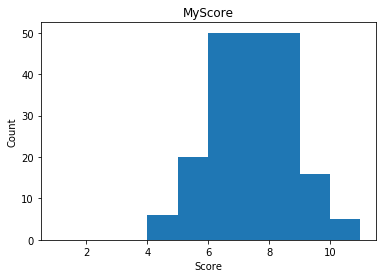

MyScore Mean: 6.944
MyScore St. Dev.: 1.318


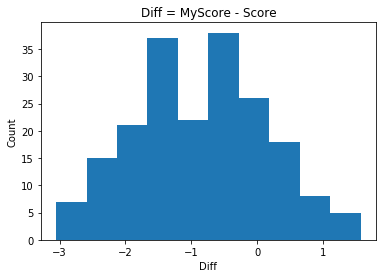

In [17]:
#MyScore distribution
a = DFA.loc[:,'myscore']
counts,bins,bars = plt.hist(a,bins=range(1,12))
counts = counts.astype(int).tolist()
counts_round = ["{}%".format(round(counts[i]/sum(counts)*100)) for i in range(len(counts))]
counts_round_ideal = ['0%','0%','0%','<5%','10%','30%','30%','20%','5%','<5%']
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('MyScore')
plt.show()

print('MyScore Mean: %.3f' % np.mean(a))
print('MyScore St. Dev.: %.3f' % np.std(a))

#Score Difference distribution
scores_diff = DFA.loc[:,'myscore'] - DFA.loc[:,'score']
plt.hist(scores_diff)
plt.xlabel('Diff')
plt.ylabel('Count')
plt.title('Diff = MyScore - Score')
plt.show()

DFA['diff'] = scores_diff

/Users/Joshua/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Joshua/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


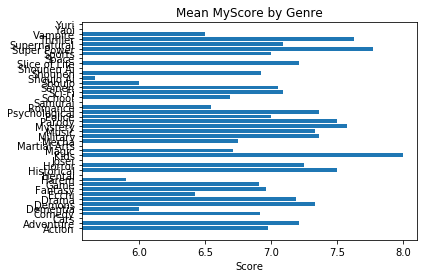

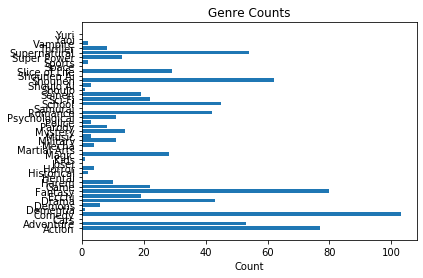

In [9]:
#Genre distribution
names_genre = ['Action','Adventure','Cars','Comedy','Dementia','Demons','Drama','Ecchi','Fantasy','Game','Harem', \
              'Hentai','Historical','Horror','Josei','Kids','Magic','Martial Arts','Mecha','Military','Music', \
              'Mystery','Parody','Police','Psychological','Romance','Samurai','School','Sci-Fi','Seinen','Shoujo', \
              'Shoujo Ai','Shounen','Shounen Ai','Slice of Life','Space','Sports','Super Power','Supernatural', \
              'Thriller','Vampire','Yaoi','Yuri']
len(names_genre)

#create a list of genre & myscore pairs
list_pairs_genre = [ [DFA.loc[j,'myscore'],i] for j in range(len(DFA)) for i in DFA['genres'][j]]
#initalize a list of list of genre scores
scores_genre = [ [] for i in range(len(names_genre))]

#populating scores_genre list with lists of all MyScores for each genre
for i in range(len(list_pairs_genre)):
    index  = names_genre.index(list_pairs_genre[i][1])
    scores_genre[index] = scores_genre[index] + [list_pairs_genre[i][0]]

    
mean_score_genre = [np.mean(i) for i in scores_genre]
count_score_genre = [len(i) for i in scores_genre]


plt.barh(names_genre,mean_score_genre)
plt.xlabel('Score')
plt.xlim(min(mean_score_genre)-0.1,max(mean_score_genre)+0.1)
plt.title('Mean MyScore by Genre')
plt.show()

plt.barh(names_genre,count_score_genre)
plt.xlabel('Count')
plt.title('Genre Counts')
plt.show()

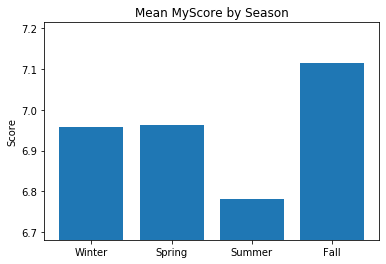

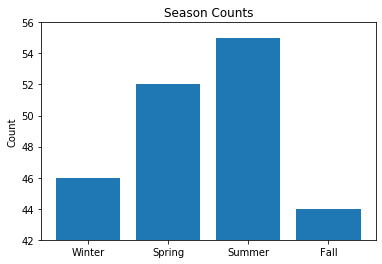

In [10]:
#Season distribution

#create a list of season & myscore pairs
list_pairs_season = [ [DFA.loc[j,'myscore'],DFA.loc[j,'season']] for j in range(len(DFA))]

#initalize a list of list of season scores
scores_season = [ [] for i in range(len(names_season))]

#populating scores_season list with lists of all MyScores for each season
for i in range(len(list_pairs_season)):
    index  = names_season.index(list_pairs_season[i][1])
    scores_season[index] = scores_season[index] + [list_pairs_season[i][0]]

    
mean_score_season = [np.mean(i) for i in scores_season]
count_score_season = [len(i) for i in scores_season]


plt.bar(names_season,mean_score_season)
plt.ylabel('Score')
plt.ylim(min(mean_score_season)-0.1,max(mean_score_season)+0.1)
plt.title('Mean MyScore by Season')
plt.show()

plt.bar(names_season,count_score_season)
plt.ylabel('Count')
plt.ylim(min(count_score_season)-2,max(count_score_season)+1)
plt.title('Season Counts')
plt.show()

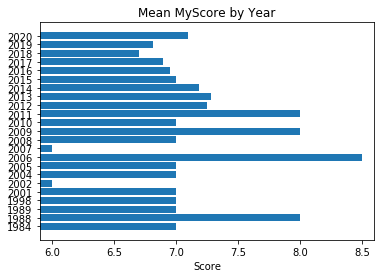

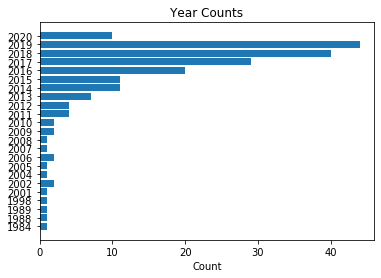

In [11]:
#Year distribution

#create a list of year & myscore pairs
list_pairs_year = [ [DFA.loc[j,'myscore'],DFA.loc[j,'year']] for j in range(len(DFA))]

#initalize a list of list of year scores
names_year = np.unique(DFA['year'])
names_year = names_year.tolist()
scores_year = [ [] for i in range(len(names_year))]

#populating scores_year list with lists of all MyScores for each year
for i in range(len(list_pairs_year)):
    index  = names_year.index(list_pairs_year[i][1])
    scores_year[index] = scores_year[index] + [list_pairs_year[i][0]]

    
mean_score_year = [np.mean(i) for i in scores_year]
count_score_year = [len(i) for i in scores_year]


plt.barh(names_year,mean_score_year)
plt.xlabel('Score')
plt.xlim(min(mean_score_year)-0.1,max(mean_score_year)+0.1)
plt.title('Mean MyScore by Year')
plt.show()

plt.barh(names_year,count_score_year)
plt.xlabel('Count')
plt.xlim(min(count_score_year)-1,max(count_score_year)+2)
plt.title('Year Counts')
plt.show()

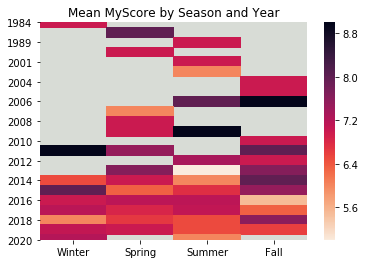

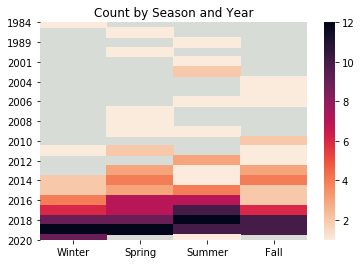

In [12]:
#Season & Year distribution

#create a list of year & myscore pairs
list_pairs_SY = [ [DFA.loc[j,'myscore'],DFA.loc[j,'season'],DFA.loc[j,'year']] for j in range(len(DFA))]

#initalize list of list of season & year scores
#1st layer is years matrixSY[0]; 2nd layer is seasons matrixSY[0][0]
scores_SY = [ [ [] for j in range(len(names_season))] for i in range(len(names_year))]

#populating matrixSY with lists of all MyScores for each season/year combination
for i in range(len(list_pairs_SY)):
    indexI  = names_year.index(list_pairs_SY[i][2])
    indexJ  = names_season.index(list_pairs_SY[i][1])
    scores_SY[indexI][indexJ] = scores_SY[indexI][indexJ] + [list_pairs_SY[i][0]]



#initializing mean_score_SY and count_score_SY
mean_score_SY = copy.deepcopy(scores_SY)
count_score_SY = copy.deepcopy(scores_SY)

for i in range(len(names_year)):
    for j in range(len(names_season)):
        mean_score_SY[i][j] = np.mean(scores_SY[i][j])
        count_score_SY[i][j] = len(scores_SY[i][j])
        

#convert list of lists into data frame for seaborn package
df_mean_score_SY = pd.DataFrame(mean_score_SY,columns=names_season,index=names_year)
df_count_score_SY = pd.DataFrame(count_score_SY,columns=names_season,index=names_year)

cmap = sns.cm.rocket_r #https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbara
ax = sns.heatmap(df_mean_score_SY,cmap=cmap)
ax.set_facecolor('xkcd:light grey') #color for NAs
plt.title('Mean MyScore by Season and Year')
plt.show()

cmap = sns.cm.rocket_r #https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbara
ax = sns.heatmap(df_count_score_SY.replace(0,np.nan),cmap=cmap)
ax.set_facecolor('xkcd:light grey') #color for NAs
plt.title('Count by Season and Year')
plt.show()

In [13]:
counts

[0, 0, 0, 6, 20, 50, 50, 50, 16, 5]

In [14]:
counts_round

['0%', '0%', '0%', '3%', '10%', '25%', '25%', '25%', '8%', '3%']

In [18]:
counts_round_ideal

['0%', '0%', '0%', '<5%', '10%', '30%', '30%', '20%', '5%', '<5%']

In [15]:
%whos

Variable                    Type              Data/Info
-------------------------------------------------------
BeautifulSoup               type              <class 'bs4.BeautifulSoup'>
DFA                         DataFrame              myscore     status  <...>\n[197 rows x 13 columns]
Request                     type              <class 'urllib.request.Request'>
URL                         str               https://myanimelist.net/anime/40174/
a                           Series            0      7\n1      4\n2    <...>Length: 197, dtype: int64
ast                         module            <module 'ast' from '/User<...>a3/lib/python3.7/ast.py'>
ax                          AxesSubplot       AxesSubplot(0.125,0.125;0.62x0.755)
bars                        silent_list       <a list of 10 Patch objects>
bins                        ndarray           11: 11 elems, type `int64`, 88 bytes
cmap                        ListedColormap    <matplotlib.colors.Listed<...>p object at 0x1a2155c910>
colu

In [16]:
DFA.to_excel("DFA.xlsx")